## Практическое задание № 7 ##

### Урок 7. Многомерный статистический анализ. Линейная регрессия

1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.
2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).
3. В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?
4. *Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Задача N 1
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [8]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
b = (np.mean(X * y) - np.mean(X) * np.mean(y)) / (np.mean(X ** 2) - np.mean(X) ** 2)
b

2.620538882402765

In [9]:
a = np.mean(y) - b * np.mean(X)
a

444.1773573243596

In [10]:
y_hat = a + b * X
y_hat

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

In [11]:
y

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

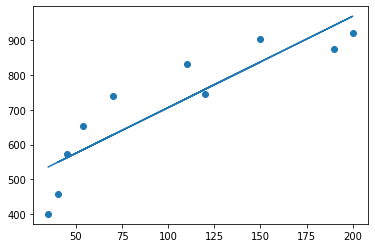

In [12]:
plt.scatter(X, y)
plt.plot(X, a + b * X)
plt.show()

> a = 444.177
>
> b=  2.620

In [15]:
X = X[..., None]
X

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [16]:
y = y[..., None]
y

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [18]:
from numpy.linalg import inv

$$\hat{B} = (X^{T}*X)^{-1}*X^{T}*y $$

In [23]:
b = inv(X.T @ X) @ X.T @ y
b[0][0]

5.889820420132689

> b = 5.89

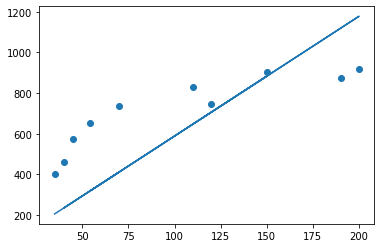

In [25]:
plt.scatter(X, y)
plt.plot(X, b * X)
plt.show()

#### Задача N 2
Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [59]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

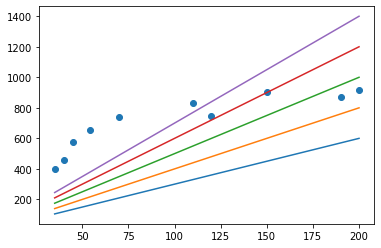

In [61]:
X1 = X.copy()
X1.sort()
plt.scatter(X, y)
plt.plot(X1, 3 * X1)
plt.plot(X1, 4 * X1)
plt.plot(X1, 5 * X1)
plt.plot(X1, 6 * X1)
plt.plot(X1, 7 * X1)
plt.show()

> начальное значение для b = 3, дельта положительная
>

$$MSE' = \frac{2}{n} {\sum\limits_{i=1}^{n} x_i(b x_i - y_i) }$$

In [31]:
def mse_(X,y,b):
    return np.sum((b*X-y)**2)/len(X)

In [32]:
def mse_p(X, y, b):
    return 2 / len(X) * np.sum((b * X - y) * X)

In [47]:
B1 = 3
alpha = 1e-6

In [48]:
for i in range(1000):
    B1 -= alpha*mse_p(X,y,B1)
    if i%100==0:
        print(f'B1={B1} mse={mse_(X,y,B1)}')

B1=3.0796238 mse=165313.49342220597
B1=5.717902217801731 mse=56924.037790840724
B1=5.879303053454158 mse=56518.382314353905
B1=5.889177003668632 mse=56516.86411902167
B1=5.88978105811757 mse=56516.85843706442
B1=5.889818012099447 mse=56516.85841579931
B1=5.889820272817466 mse=56516.85841571972
B1=5.889820411120448 mse=56516.85841571941
B1=5.889820419581351 mse=56516.8584157194
B1=5.8898204200989595 mse=56516.85841571941


> B1=5.889820420132673 при mse=56516.85841571943

#### Задача N 3
В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?

#### Задача N 4*
Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).